# Download warpper for S2 data 

Wrapper script to download S2 data needed as input to TEDS

## 1. Set environment

In [1]:
import sys
import os
# define  path to search for module
sys.path.append("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/")
os.chdir("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp_getS2/")

## 2. Import libraries

In [2]:
import numpy as np
from teds.sgm import download_sentinel2_albedo

## 3. Define target 

In [3]:
#station_name = 'Matimba'
station_name = 'Jaenschwalde'
#station_name = 'Belchatow'
#station_name = 'Lipetsk'

## 4. Define the configuration

##

In [4]:
config = {}
config['gm_input'] = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/gm/Tango_Carbon_gm_exp1.0_'+ station_name+'.nc'
config['sentinel2'] = {}
config['sentinel2']['band_section'] = ['B01','B02','B03','B04','B05','B06','B07', 'B8A', 'B09','B11','B12']
#config['sentinel2']['band_section'] = ['B11']

config['sentinel2']['albedo_file'] ='./data/s2_'+station_name+'.nc'

## 5. Download data

In [5]:
s2_albedos = download_sentinel2_albedo(config)

[15:00:46] Downloading Sentinel 2 albedo for band B11
S2A_33UVT_20230209_0_L2A/B11.tif: 100%|██████████| 16.5M/16.5M [00:04<00:00, 3.79MB/s]
S2A_33UVT_20221114_0_L2A/B11.tif: 100%|██████████| 59.6M/59.6M [00:10<00:00, 5.50MB/s]
[15:01:05] Downloading Sentinel 2 albedo for band SCL
S2A_33UVT_20230209_0_L2A/SCL.tif: 100%|██████████| 1.21M/1.21M [00:01<00:00, 975kB/s] 
S2A_33UVT_20221114_0_L2A/SCL.tif: 100%|██████████| 3.82M/3.82M [00:02<00:00, 1.33MB/s]


## 6. Plotting data

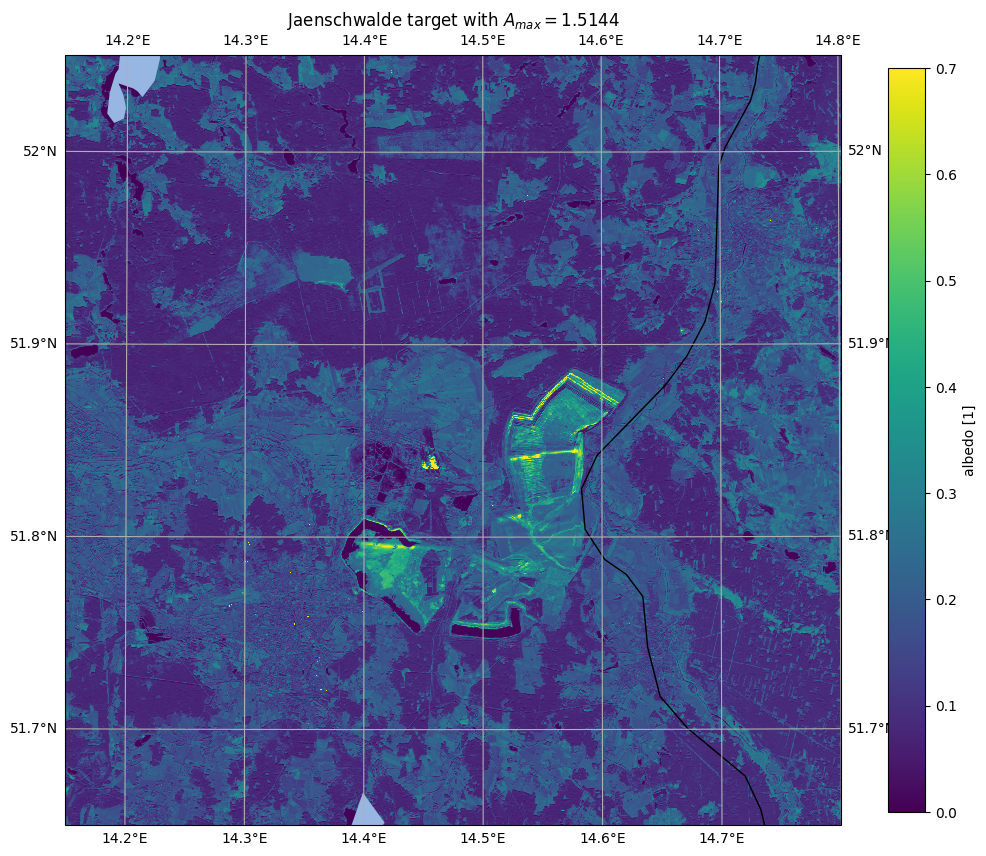

In [7]:
s2_albedo = s2_albedos[0]
#plot on lat/lon map
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import LAND, COASTLINE, RIVERS, LAKES, BORDERS
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import matplotlib.pyplot as plt

s2_albedo = s2_albedo.rio.reproject('EPSG:4326')
s2_albedo = s2_albedo.rename({'x': 'lon', 'y': 'lat'})

gm_input = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/gm/Tango_Carbon_gm_exp1.0_'+station_name+'.nc'
gm_data = Dataset(gm_input)

path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/'
reader = shpreader.Reader('/home/jochen/.local/share/cartopy/shapefiles/natural_earth/cultural/ne_110m_admin_0_countries.shp')


if(station_name == 'Matimba'):
    central_lat, central_lon = -23.6688333, 27.610838  #From microHH Matimba data
    lat_low  = -23.85
    lat_high = -23.5
    lon_low  = 27.4
    lon_high = 27.8

if(station_name == 'Jaenschwalde'):
    central_lat, central_lon = 51.83472, 14.46277#From microHH Jaenschwalde data
    lat_low = 51.65
    lat_high = 52.05
    lon_low = 14.15
    lon_high = 14.80

if(station_name == 'Belchatow'):
    central_lat, central_lon = 51.266389, 19.330556 #From microHH Belchatov data
    lat_low = 51.05
    lat_high = 51.45
    lon_low = 18.9
    lon_high = 19.7

if(station_name == 'Lipetsk'):
    central_lat, central_lon = 52.57123, 39.6945 #From microHH Lipestk data
    lat_low = 52.75
    lat_high = 52.35
    lon_low = 39.4
    lon_high = 40

extent = [lon_low, lon_high, lat_low, lat_high]

#interactive plotting in separate window
# %matplotlib qt  
#plotting within notebook
%matplotlib inline 
fig, ax = plt.subplots(1, 1, figsize=(12, 10), dpi=100,   subplot_kw={
    'projection': ccrs.Orthographic(central_lon, central_lat)},)

ax.set_extent((lon_low, lon_high, lat_low, lat_high))
ax.stock_img()
ax.add_feature(LAND)
ax.add_feature(BORDERS)
ax.add_feature(COASTLINE)
ax.add_feature(RIVERS)
ax.add_feature(LAKES)
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_xlabel("longitude [$^o$]")
ax.set_ylabel("latitude [$^o$]")
ax.set_title(station_name + ' target with $A_{max} = $' + str(np.max(s2_albedo.values[0,:]*1.E-4)))

mesh = ax.pcolormesh(s2_albedo.lon, s2_albedo.lat, s2_albedo.values[0,:]*1.E-4, alpha=1.0, transform=ccrs.PlateCarree(),
                     cmap='viridis', vmax=0.7, vmin=0.)

plt.plot(gm_data['lon'][:], gm_data['lat'][:], c='green', marker='o',  alpha = 0.8, linestyle='None', markersize = 1,
     transform=ccrs.PlateCarree(),)

cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('albedo [1]')